In [1]:
#from Tools import RSDC as RSDCsim
import numpy as np
import pandas as pd
from scipy.stats import norm
import Libraries.Hmm 
import Tools 
import time

# Start timing
# start_time = time.time()
# reload(EM)
# from EM import Base
O = 1000
K = 1
N = 3

from Tools import AR as ARsim
sim = ARsim(n_states=N, K_series = K, num_obs = O, transition_diagonal=0.99, deterministic=True) #sigmas = [[0,0]]
sim.simulate()
df = sim.data
sim.parameters = np.zeros((sim.n_states, 3))
sim.parameters[:,0] = sim.mu
sim.parameters[:,1] = sim.phi
sim.parameters[:,2] = sim.sigmas
df

,Returns 0
0,1.184371
1,4.658459
2,1.218075
3,-1.515034
4,0.045351
...,...
995,4.085143
996,1.098990
997,-3.644521
998,-11.222303


In [2]:
from importlib import reload
reload(Libraries.Hmm)
from Libraries.Hmm import Base
# phi_vals = np.zeros((K,N))
model =Base(df, n_states=3)
model.fit()


Fitting Model:  30%|████████                   | 30/100 [00:00<00:01, 62.50it/s]

The model converged!


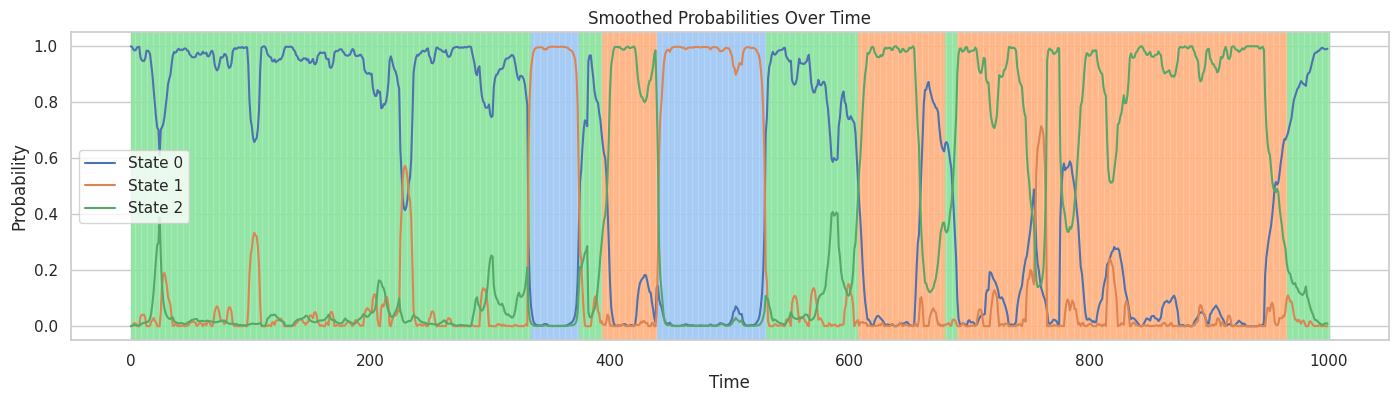

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# # Determine unique states for coloring
states = np.unique(sim.full_data[:, 0])
colors = sns.color_palette("pastel", len(states))

# Create a color map based on states
state_colors = {state: colors[i] for i, state in enumerate(states)}
# Plotting
plt.figure(figsize=(17, 4))


# Shade the background based on states
for t in range(model.T):
    state = int(sim.full_data[t, 0])
    plt.axvspan(t, t+1, color=state_colors[state], alpha=0.6)
plt.plot(model.u_hat[0,:], label=f'State {0}')
plt.plot(model.u_hat[1,:], label=f'State {1}')
plt.plot(model.u_hat[2,:], label=f'State {2}')
plt.title('Smoothed Probabilities Over Time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.savefig('Smoothed.png')
plt.show()

In [1]:

# reload(EM)
# from EM import Base
O = 10000
K = 1
N = 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

    # Placeholder for your simulation and estimation functions
    # Since I can't run your specific RSDC and RSDCEM classes, I'm using placeholders

def simulate_RSDC():
    # Simulate the RSDC model
    mu = np.zeros((1,N))
    mu[0] = 0.1,  -0.1
    phi = np.zeros((1,N))
    phi[0] = 0.6, -0.4
    sigmas = np.zeros((1,N))
    sigmas[0] = 0.5, 2

    sim = ARsim(n_states=N, K_series = K, num_obs = O, mu = mu,phi = phi,sigmas = sigmas,transition_diagonal=0.99, deterministic=True) #sigmas = [[0,0]]
    simulated_data = sim.simulate()
    sim_param = np.vstack((sim.mu, sim.phi, sim.sigmas)).T
    sim_trans = sim.transition_matrix
    return sim, simulated_data, sim_param, sim_trans

def estimate_RSDCEM(simulated_data,N):
    # Estimate the RSDC model using RSDCEM
    # Return estimated rho values
    model = Base(sim.data, n_states=N, max_iterations=100)
    model.fit()
    return model.parameters

# Initialize lists to store the differences

mu_diffs, phi_diffs, sigma_diffs, diagonal_diffs = [], [], [], []

n_iterations = 10000
plot_every = 100

# Main simulation and estimation loop
for i in range(n_iterations):
    sim, simulated_data, sim_param, sim_trans = simulate_RSDC()
    estimated_params = estimate_RSDCEM(simulated_data, N=N)
    
    # Calculate differences
    mu_diff = np.max(estimated_params[:, 0]) - np.max(sim_param[:, 0])
    phi_diff = np.max(estimated_params[:, 1]) - np.max(sim_param[:, 1])
    sigma_diff = np.max(estimated_params[:, 2]) - np.max(sim_param[:, 2])
    diagonal_diff = np.diag(estimated_params) - np.diag(sim_param)
    
    # Store the differences
    mu_diffs.append(mu_diff)
    phi_diffs.append(phi_diff)
    sigma_diffs.append(sigma_diff)
    diagonal_diffs.append(diagonal_diff)
    
    if (i + 1) % plot_every == 0:
        # Setup figure with 4 plots
        fig, axs = plt.subplots(1, 4, figsize=(20, 4))
        
        # Plot the histograms
        axs[0].hist(mu_diffs, bins=30, color='blue', alpha=0.7)
        axs[0].set_title('Mu Differences')
        
        axs[1].hist(phi_diffs, bins=30, color='red', alpha=0.7)
        axs[1].set_title('Phi Differences')
        
        axs[2].hist(sigma_diffs, bins=30, color='green', alpha=0.7)
        axs[2].set_title('Sigma Differences')

        axs[3].hist(np.ravel(diagonal_diffs), bins=30, color=('purple'), alpha=0.7)
        axs[3].set_title('Diagonal (Trans) Differences')

        plt.tight_layout()

        plt.savefig(f'AR Convergence{i}.png')
        plt.close()

# Create a DataFrame to store and return the differences
diffs_df = pd.DataFrame({
    'Smallest Differences': smallest_diffs,
    'Largest Differences': largest_diffs
})

NameError: name 'ARsim' is not defined

In [ ]:
model.parameters

In [ ]:
sim.parameters

In [ ]:
sim.parameters

In [ ]:
model.transition_matrix

In [ ]:
sim.transition_matrix